# Epsilon Greedy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 10                         # Number of arms
steps = 1000                   # Maximum number of time-steps
runs = 2000                    # Number of runs
epsilon = [0.0, 0.01, 0.1]     # Probability that the agent explores

# define q_star
q_star = np.random.randn(n)

# estimate-value for greedy approach
N1 = np.zeros(n)
Q1 = np.zeros(n)

# estimate-value for eplison-greedy approach with epsilon=0.01
N2 = np.zeros(n)
Q2 = np.zeros(n)

# estimate-value for eplison-greedy approach with epsilon=0.1
N3 = np.zeros(n)
Q3 = np.zeros(n)

# define average rewards for each agent
avg_rewards1 = np.zeros(steps)
avg_rewards2 = np.zeros(steps)
avg_rewards3 = np.zeros(steps)

# average of number of times optimal action was taken
avg_optimal1 = np.zeros(steps)
avg_optimal2 = np.zeros(steps)
avg_optimal3 = np.zeros(steps)

for run in range(runs):
    # reset estimates and counts and q_star
    q_star = np.random.randn(n)
    Q1.fill(0)
    N1.fill(0)
    Q2.fill(0)
    N2.fill(0)
    Q3.fill(0)
    N3.fill(0)
    for t in range(steps):
        # take an action greedily; note that epsilon[0] = 0
        if np.random.rand() < epsilon[0]:
            A1 = np.random.choice(n)
        else:
            A1 = np.argmax(Q1)

        # take an action greedily. Alternatively choose to explore with probability epsilon[1]
        if np.random.rand() < epsilon[1]:
            A2 = np.random.choice(n)
        else:
            A2 = np.argmax(Q2)

        # take an action greedily. Alternatively choose to explore with probability epsilon[2]
        if np.random.rand() < epsilon[2]:
            A3 = np.random.choice(n)
        else:
            A3 = np.argmax(Q3)
  
        # Reward will be a function of q_star in this case
        R1 = q_star[A1] + np.random.randn()
        R2 = q_star[A2] + np.random.randn()
        R3 = q_star[A3] + np.random.randn()

        # Update estimated-value
        N1[A1] += 1
        Q1[A1] += (R1 - Q1[A1]) / N1[A1]

        N2[A2] += 1
        Q2[A2] += (R2 - Q2[A2]) / N2[A2]

        N3[A3] += 1
        Q3[A3] += (R3 - Q3[A3]) / N3[A3]


        # Add rewards so to calculate their average
        avg_rewards1[t] += R1 / runs
        avg_rewards2[t] += R2 / runs
        avg_rewards3[t] += R3 / runs

        # Add to the number of optimal action selected
        avg_optimal1[t] += 1 / runs if A1 == np.argmax(q_star) else 0
        avg_optimal2[t] += 1 / runs if A2 == np.argmax(q_star) else 0
        avg_optimal3[t] += 1 / runs if A3 == np.argmax(q_star) else 0

    # print progress
    print(f'\rRun {run + 1:0>4} out of {runs:0>4}', end='')

Run 2000 out of 2000

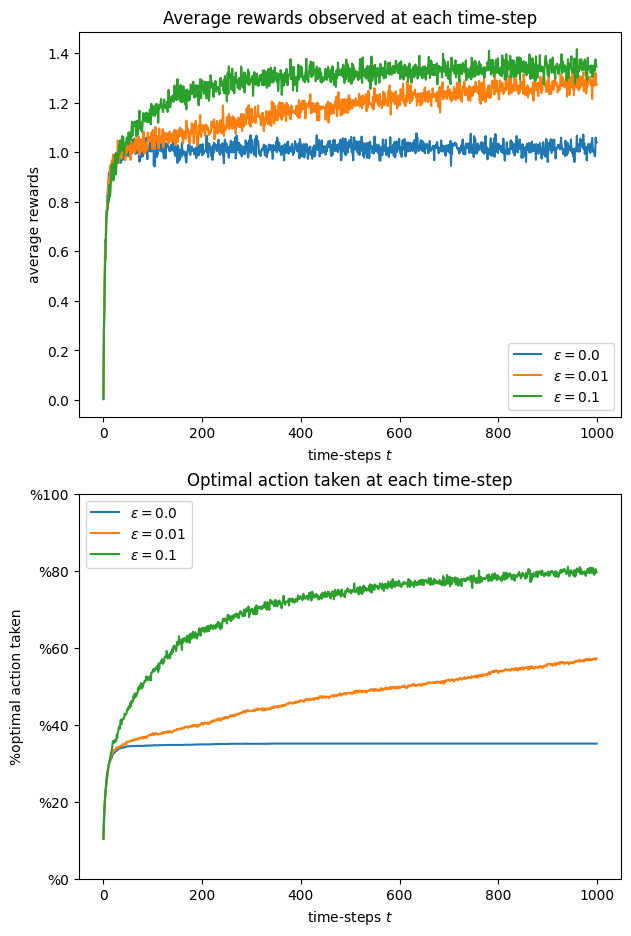

In [3]:
fig = plt.figure(figsize=(7, 11))
ax = plt.subplot(211)
line1, = ax.plot(avg_rewards1, label='$\epsilon=$' + str(epsilon[0]))
line2, = ax.plot(avg_rewards2, label='$\epsilon=$' + str(epsilon[1]))
line3, = ax.plot(avg_rewards3, label='$\epsilon=$' + str(epsilon[2]))
ax.legend(handles=[line1, line2, line3], loc='best')
ax.set_xlabel('time-steps $t$')
ax.set_ylabel('average rewards')
ax.set_title('Average rewards observed at each time-step');

ax = plt.subplot(212)
line1, = ax.plot(avg_optimal1 * 100, label='$\epsilon=$' + str(epsilon[0]))
line2, = ax.plot(avg_optimal2 * 100, label='$\epsilon=$' + str(epsilon[1]))
line3, = ax.plot(avg_optimal3 * 100, label='$\epsilon=$' + str(epsilon[2]))
ax.legend(handles=[line1, line2, line3], loc='best')
ax.set_xlabel('time-steps $t$')
ax.set_ylabel('%optimal action taken')
ax.set_title('Optimal action taken at each time-step');
ax.set_ylim([0, 100]);
ax.set_yticks(range(0, 101, 20));
ax.set_yticklabels(['%' + str(x) for x in range(0, 101, 20)]);